In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [2]:
boston_data = load_boston()
print(boston_data['feature_names'])
boston_data.keys()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
df = pd.DataFrame(boston_data.data, columns=boston_data['feature_names'])
df['target'] = boston_data['target']



In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# check the data (exploratory analysis)

<AxesSubplot:>

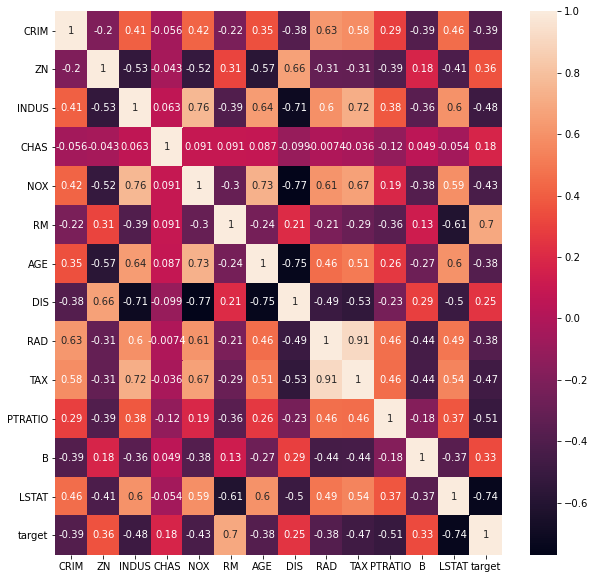

In [6]:
plt.figure(figsize=(10,10))
corellation_matrix = df.corr()
sns.heatmap(data=corellation_matrix, annot=True)

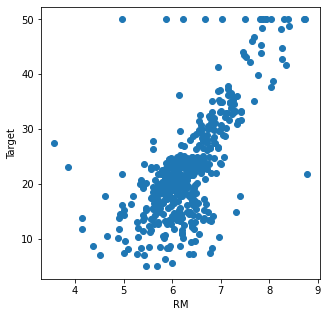

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(df['RM'],df['target'],marker='o')
plt.xlabel('RM')
plt.ylabel('Target')
plt.show()

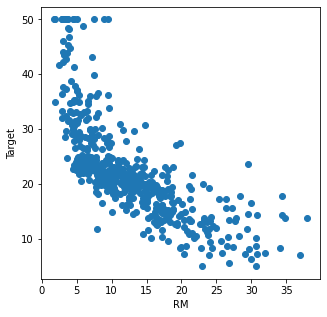

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(df['LSTAT'],df['target'],marker='o')
plt.xlabel('RM')
plt.ylabel('Target')
plt.show()

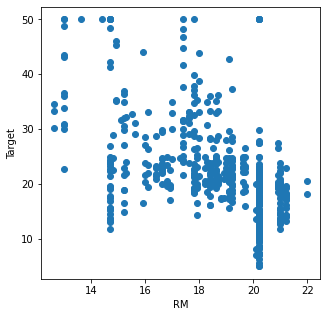

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(df['PTRATIO'],df['target'],marker='o')
plt.xlabel('RM')
plt.ylabel('Target')
plt.show()

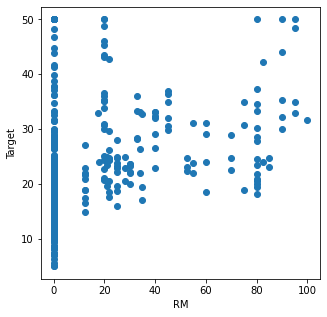

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(df['ZN'],df['target'],marker='o')
plt.xlabel('RM')
plt.ylabel('Target')
plt.show()

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = df.iloc[:,0:13]
y = df['target']

y = np.round(df['target'])

bestFeatures = SelectKBest(score_func=chi2)
fit = bestFeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfscores['Feature'] = x.columns
dfscores

,0,Feature
0,5503.817133,CRIM
1,5937.859414,ZN
2,873.746270,INDUS
3,59.080170,CHAS
4,5.073299,NOX
5,21.981504,RM
6,2424.308937,AGE
7,163.919426,DIS
8,1445.257647,RAD
9,14817.836927,TAX


In [8]:
### select the most important features. Some questions you can ask yourself:
#- What are the correlations?
#- Independent or dependent?
#- Does the feature have different values across the dataset?

In [47]:
from sklearn import preprocessing
X = pd.DataFrame(df['RM'])
X['LSTAT'] = df['LSTAT']
X = preprocessing.StandardScaler().fit_transform(X)
y



0      24.0
1      22.0
2      35.0
3      33.0
4      36.0
       ... 
501    22.0
502    21.0
503    24.0
504    22.0
505    12.0
Name: target, Length: 506, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 0)

In [55]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

print('Training Score: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, y_test)))



Training Score: 1.0
Testing Score: 0.1568627450980392


In [1]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=99)
rfc.fit(X_train, y_train)
print('Training Score: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, y_test)))


NameError: name 'X_train' is not defined

In [10]:
## Pick one model to use, such as Linear Regression -seen in class-.

In [11]:
## test the accuracy and print the score with one model